#Day19. 통계분석기초

---



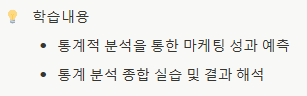

## Day18 수업 이어서 진행

## **고객 세분화를 위한 통계 분석**

고객 세분화(Customer Segmentation)는 고객의 특성과 행동 패턴을 분석하여 비슷한 그룹으로 나누는 과정  
이를 통해 맞춤형 마케팅 전략을 수립하고, 고객 만족도를 높이며, 기업의 수익을 극대화할 수 있음

고객 세분화를 수행하기 위해 다양한 통계 분석 기법이 활용되며, 대표적인 방법으로 기술 통계 분석, K-평균 군집 분석, RFM 분석, 계층적 군집 분석이 있음

## **기술 통계 분석**

기술 통계 분석은 데이터의 분포와 기본적인 특징을 파악하는 데 사용됨  
고객 데이터를 분석할 때 자주 사용되는 통계 지표는 다음과 같음

- 평균 (Mean): 고객 1인당 평균 구매 금액, 평균 방문 횟수 등을 분석하는 데 사용
- 중앙값 (Median): 데이터의 중앙값을 계산하여 이상치의 영향 최소화
- 표준편차 (Standard Deviation): 고객 간 소비 패턴의 차이를 파악하는 데 도움을 줌
- 최댓값 및 최솟값 (Max & Min): 가장 높은 구매 금액과 가장 낮은 구매 금액 확인

In [ ]:
import pandas as pd

data = {
    "고객ID": range(1, 11),
    "총구매금액": [50000, 150000, 30000, 400000, 120000, 80000, 60000, 200000, 90000, 250000],
    "방문횟수": [5, 20, 3, 40, 12, 8, 6, 25, 10, 35]
}

df = pd.DataFrame(data)

# 기술 통계 분석 수행
summary_stats = df.describe()
display(summary_stats)

,고객ID,총구매금액,방문횟수
count,10.00000,10.000000,10.000000
mean,5.50000,143000.000000,16.400000
std,3.02765,113729.699043,13.074148
min,1.00000,30000.000000,3.000000
25%,3.25000,65000.000000,6.500000
50%,5.50000,105000.000000,11.000000
75%,7.75000,187500.000000,23.750000
max,10.00000,400000.000000,40.000000


### **K-평균 군집 분석**

K-평균 군집 분석(K-Means Clustering)은 고객을 여러 개의 그룹으로 나누는 방법  
유사한 특성을 가진 고객끼리 묶어 그룹을 생성하며, 그룹의 개수(K)는 사전에 지정해야 함

이 방법을 사용하면 고객을 고가 제품 선호 그룹, 할인 제품 선호 그룹 등으로 구분 가능

In [4]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.3 MB/s eta 0:00:00


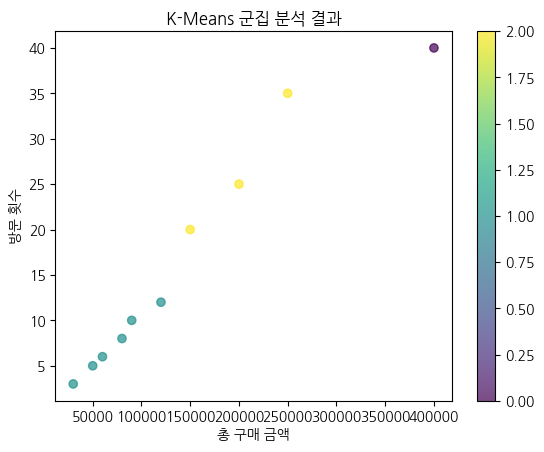

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = {
    "고객ID": range(1, 11),
    "총구매금액": [50000, 150000, 30000, 400000, 120000, 80000, 60000, 200000, 90000, 250000],
    "방문횟수": [5, 20, 3, 40, 12, 8, 6, 25, 10, 35]
}

df = pd.DataFrame(data)
X = df[["총구매금액", "방문횟수"]]

# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
df["군집"] = kmeans.fit_predict(X)

# 시각화
plt.scatter(X["총구매금액"], X["방문횟수"], c=df["군집"], cmap="viridis", alpha=0.7)
plt.xlabel("총 구매 금액")
plt.ylabel("방문 횟수")
plt.title("K-Means 군집 분석 결과")
plt.colorbar()
plt.show()

### RFM 분석

RFM 분석(Recency, Frequency, Monetary Analysis)은 고객을 최근성(Recency), 빈도(Frequency), 금액(Monetary) 기준으로 평가하여 고객의 가치를 측정하는 방법

- 최근성 (Recency): 고객이 마지막으로 구매한 날짜를 기준으로 측정
- 빈도 (Frequency): 일정 기간 동안 고객이 구매한 횟수 측정
- 금액 (Monetary): 고객이 사용한 총 금액을 기준으로 평가
이 분석을 통해 VIP 고객, 일반 고객, 이탈 가능 고객을 구분할 수 있음


In [ ]:
import numpy as np

data = {
    "고객ID": range(1, 11),
    "구매일": pd.date_range(start="2024-01-01", periods=10, freq="30D"),
    "총구매금액": [50000, 150000, 30000, 400000, 120000, 80000, 60000, 200000, 90000, 250000]
}

df = pd.DataFrame(data)

# 현재 날짜 기준 최근성 계산
df["Recency"] = (pd.to_datetime("today") - df["구매일"]).dt.days

# 빈도와 금액 계산
df["Frequency"] = np.random.randint(1, 20, len(df))
df["Monetary"] = df["총구매금액"]

# RFM 점수 부여
df["R_Score"] = pd.qcut(df["Recency"], 5, labels=[5, 4, 3, 2, 1])
df["F_Score"] = pd.qcut(df["Frequency"], 5, labels=[1, 2, 3, 4, 5])
df["M_Score"] = pd.qcut(df["Monetary"], 5, labels=[1, 2, 3, 4, 5])

df["RFM_Score"] = df["R_Score"].astype(int) +  df["F_Score"].astype(int) +  df["M_Score"].astype(int)

display(df[["고객ID", "Recency", "Frequency", "Monetary", "RFM_Score"]])

,고객ID,Recency,Frequency,Monetary,RFM_Score
0,1,423,16,50000,6
1,2,393,1,150000,6
2,3,363,14,30000,6
3,4,333,1,400000,8
4,5,303,11,120000,9
5,6,273,9,80000,7
6,7,243,17,60000,10
7,8,213,17,200000,12
8,9,183,18,90000,13
9,10,153,6,250000,12


###**계층적 군집 분석**
계층적 군집 분석(Hierarchical Clustering)은 고객을 계층 구조로 그룹화하여 유사도에 따라 점진적으로 병합하는 방법  
이 분석을 통해 고객을 세부적인 등급으로 나눌 수 있음

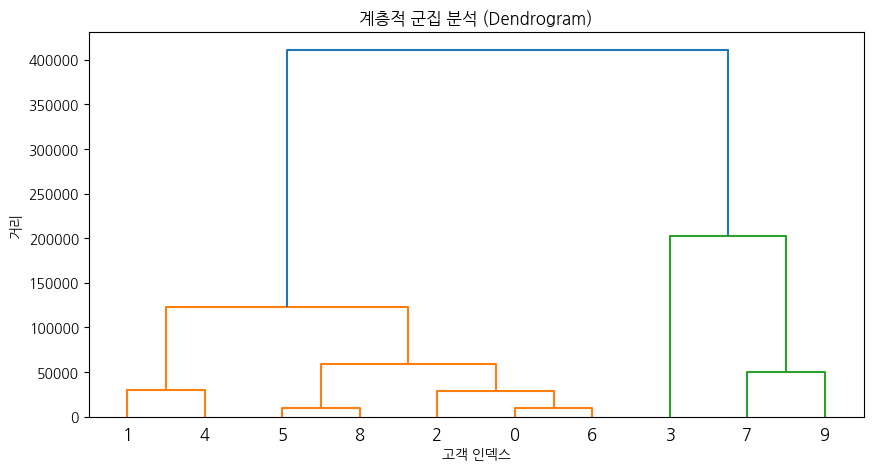

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

data = {
    "고객ID": range(1, 11),
    "총구매금액": [50000, 150000, 30000, 400000, 120000, 80000, 60000, 200000, 90000, 250000],
    "방문횟수": [5, 20, 3, 40, 12, 8, 6, 25, 10, 35]
}

df = pd.DataFrame(data)
X = df[["총구매금액", "방문횟수"]]

# 계층적 군집 분석 수행
linkage_matrix = linkage(X, method="ward")

# 덴드로그램 시각화
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("계층적 군집 분석 (Dendrogram)")
plt.xlabel("고객 인덱스")
plt.ylabel("거리")
plt.show()



---

#### 고객 세분화는 데이터 기반의 마케팅 전략을 수립하는 데 필수적인 과정임
- 기술 통계 분석을 통해 고객의 기본적인 특성 이해
- K-평균 군집 분석을 사용하여 고객을 명확한 그룹으로 나누어 맞춤형 마케팅 진행
- RFM 분석을 활용하여 VIP 고객과 일반 고객을 구별하여 적절한 마케팅 전략 적용
- 계층적 군집 분석을 통해 고객의 특성을 더욱 세부적으로 분석

###**고객 세분화를 위한 실제적 시나리오 및 분석**

**시나리오**  
한 쇼핑물에서 다음과 같은 유형의 고객 존재

**1. 일반 고객**
- 비교적 저렴한 제품을 구매하여, 구매 빈도 낮음
- 방문 횟수 적으며, SNS 상에서 브랜드와의 상호작용 적음
- 프로모션이 있을 때만 관심을 가지는 경향이 있음

**2. 프리미엄 고객**
- 중고가 제품 주기적으로 구매하는 고객층
- 방문 횟수가 일반 고객보다 많고, SNS에서 브랜드를 팔로우하는 경우가 많음
- 충성도가 비교적 높지만, 경쟁 브랜드로 이탈 가능성 있음

**3. VIP 고객**
- 높은 가격의 제품을 반복적으로 구매하며, 구매 빈도와 방문 횟수가 많음
- SNS에서 브랜드와 적극적으로 소통하고, 신제품에 대한 관심 높음
- VIP 혜택과 개인 맞춤형 서비스를 중요하게 여김



---

##**주요 분석 기법 및 코드 예제**

###**1. 기술 통계 분석**

In [12]:
import pandas as pd

# 데이터 로드
csv_filename = "customer_segmentation.csv"
df = pd.read_csv(csv_filename)

# 기본 통계 정보 출력
display(summary_stats)

,고객ID,총구매금액,방문횟수
count,10.00000,10.000000,10.000000
mean,5.50000,143000.000000,16.400000
std,3.02765,113729.699043,13.074148
min,1.00000,30000.000000,3.000000
25%,3.25000,65000.000000,6.500000
50%,5.50000,105000.000000,11.000000
75%,7.75000,187500.000000,23.750000
max,10.00000,400000.000000,40.000000


###**2. K-평균 군집 분석**

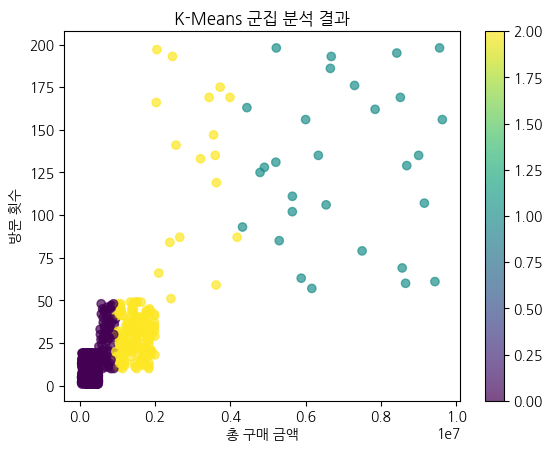

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[["총 구매 금액", "방문 횟수"]]

kmeans = KMeans(n_clusters=3, random_state=42)
df["군집"] = kmeans.fit_predict(X)

plt.scatter(X["총 구매 금액"], X["방문 횟수"], c=df["군집"], cmap="viridis", alpha=0.7)
plt.xlabel("총 구매 금액")
plt.ylabel("방문 횟수")
plt.title("K-Means 군집 분석 결과")
plt.colorbar()
plt.show()

###**3. RFM 분석**

In [15]:
import numpy as np

df["최근 구매일"] = pd.to_datetime(df["최근 구매일"])

df["Recency"] = (pd.to_datetime("today") - df["최근 구매일"]).dt.days

df["Frequency"] = df["구매 빈도"]
df["Monetary"] = df["총 구매 금액"]

df["R_Score"] = pd.qcut(df["Recency"], 5, labels=[5, 4, 3, 2, 1])
df["F_Score"] = pd.qcut(df["Frequency"], 5, labels=[1, 2, 3, 4, 5])
df["M_Score"] = pd.qcut(df["Monetary"], 5, labels=[1, 2, 3, 4, 5])

df["RFM_Score"] = df["R_Score"].astype(int) + df["F_Score"].astype(int) + df["M_Score"].astype(int)

display(df[["고객ID", "Recency", "Frequency", "Monetary", "RFM_Score"]])

,고객ID,Recency,Frequency,Monetary,RFM_Score
0,1,650,6,369278,8
1,2,432,50,5297291,15
2,3,464,26,1199983,15
3,4,759,7,140327,5
4,5,732,5,443554,7
...,...,...,...,...,...
995,996,517,3,306353,7
996,997,620,23,771830,11
997,998,602,2,365507,6
998,999,459,70,8651143,15


RFM 분석을 통해 다음과 같은 맞춤형 전략을 수립할 수 있음

- **VIP 고객**: 특별 할인 및 맞춤형 혜택 제공
- **일반 고객**: 추가 구매를 유도하는 프로모션 실시
- **이탈 가능 고객**: 리마인드 이메일 및 할인 쿠폰 제공

###**4. 계층적 군집 분석**

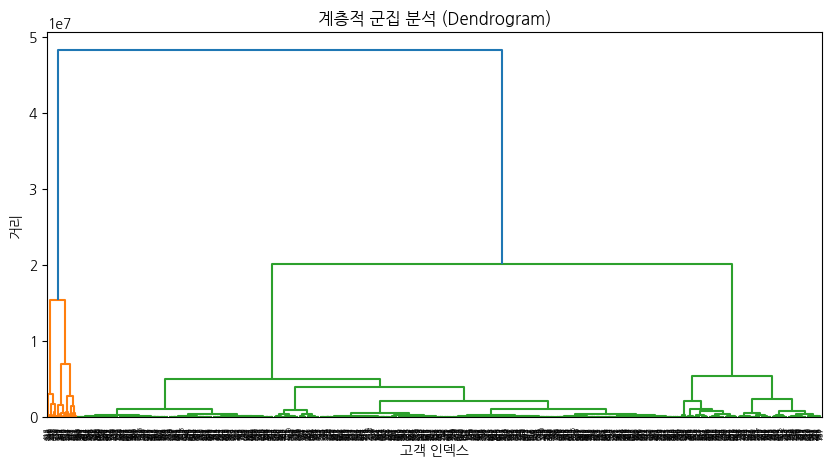

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram

X = df[["총 구매 금액", "방문 횟수"]]

# 계층적 군집 분석 수행
linkage_matrix = linkage(X, method="ward")

# 덴드로그램 시각화
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("계층적 군집 분석 (Dendrogram)")
plt.xlabel("고객 인덱스")
plt.ylabel("거리")
plt.show()

###**분석 결과 활용 방안**

분석 결과를 바탕으로 다음과 같은 전략을 적용할 수 있음

1. **일반 고객**
    - 신규 고객 확보를 위한 프로모션
    - 이메일 마케팅 및 소셜 미디어 광고 활용
2. **프리미엄 고객**
    - 리마인드 이메일 및 추가 구매 유도
    - 브랜드 충성도를 높이기 위한 VIP 프로그램 제공
3. **VIP 고객**
    - 개별 맞춤형 할인 및 특별 이벤트 초대
    - 프리미엄 고객 서비스 및 신제품 체험 기회 제공



---

##**확률변수 (Probability Variable)**  
불확실한 사건의 결과를 수치화하는 변수

###**확률변수의 유형**

###**1. 이산 확률변수 (Discrete Random Variable)**

- 특정한 개별 값만 가질 수 있는 확률변수
- 예) 동전 던지기(앞면=1, 뒷면=0), 주사위 눈금(1,2,3,4,5,6), 고객의 구매 횟수(정수값)

**대표적인 이산 확률분포:**

- **베르누이 분포 (Bernoulli Distribution)** → 성공(1) 또는 실패(0) 중 하나의 값을 가지는 확률 모델
- **이항 분포 (Binomial Distribution)** → n번 시행 중 성공이 나오는 횟수 분포
- **포아송 분포 (Poisson Distribution)** → 일정 시간 내에 발생하는 이벤트 횟수 분포

###**2. 연속 확률변수 (Continuous Random Variable)**

- 특정 구간 내의 모든 실수 값을 가질 수 있는 확률변수
- 예) 고객의 방문 시간(2.5초, 3.7초 등), 평균 구매 금액(75,000원)

**대표적인 연속 확률분포:**

- **정규 분포 (Normal Distribution)** → 자연에서 가장 많이 나타나는 분포, 평균을 중심으로 대칭적
- **지수 분포 (Exponential Distribution)** → 사건이 발생하는 시간 간격의 확률 모델
- **감마 분포 (Gamma Distribution)** → 여러 개의 지수 분포를 합친 형태

### **확률변수의 적용 예시**

1. **베르누이 확률변수 (광고 클릭 여부)**
    - 광고가 노출될 때, 클릭(1)할지 안 할지(0) 결정하는 확률변수
2. **이항 확률변수 (A/B 테스트 결과)**
    - 1000명의 고객에게 광고 A를 노출했을 때 몇 명이 클릭할 것인가?
3. **지수 확률변수 (고객의 웹사이트 체류 시간)**
    - 고객이 웹사이트에 방문 후 얼마나 오래 머무르는가?
4. **베타 확률변수  (전환율 예측)**
    - 두 가지 마케팅 전략 중 전환율이 높은 캠페인은 무엇인가?

###**확률 분포 그래프**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom, poisson, norm, expon, gamma, beta

# 데이터 시드 설정
np.random.seed(42)

#### **1. 베르누이 분포 (Bernoulli Distribution)**  
→ 성공(1) 또는 실패(0) 중 하나의 값을 가지는 확률 모델
- 특정 사건이 발생할 확률을 나타냄 (예: 광고 클릭 여부, 0 또는 1)

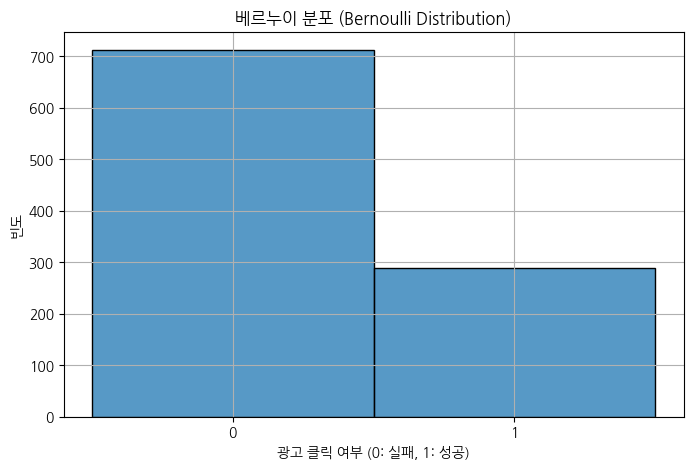

In [18]:
# 1. 베르누이 분포 (Bernoulli Distribution) - 광고 클릭 여부 (0 or 1)
bernoulli_data = bernoulli.rvs(p=0.3, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(bernoulli_data, discrete=True, kde=False, bins=2)
plt.xlabel("광고 클릭 여부 (0: 실패, 1: 성공)")
plt.ylabel("빈도")
plt.title("베르누이 분포 (Bernoulli Distribution)")
plt.xticks([0, 1])
plt.grid()
plt.show()

####**2. 이항 분포 (Binomial Distribution)**  
→ n번 시행 중 성공이 나오는 횟수 분포
- 일정 횟수(n) 동안 특정 사건이 발생하는 횟수를 모델링 (예: 10번의 광고 노출 중 클릭 횟수)

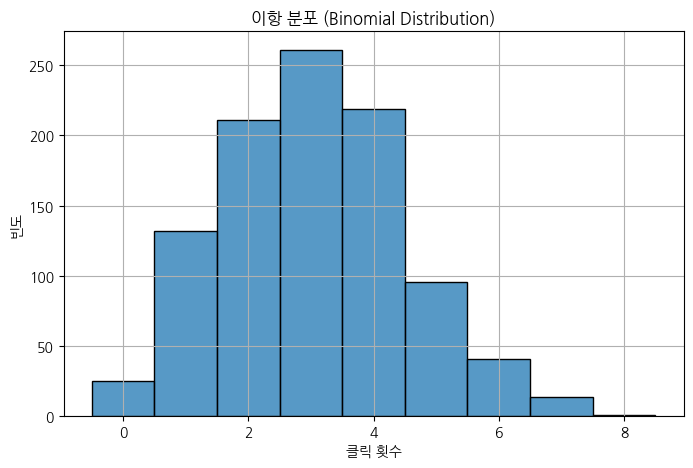

In [19]:
# 2. 이항 분포 (Binomial Distribution) - 10번 광고 노출 중 클릭 횟수
binom_data = binom.rvs(n=10, p=0.3, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(binom_data, discrete=True, kde=False, bins=11)
plt.xlabel("클릭 횟수")
plt.ylabel("빈도")
plt.title("이항 분포 (Binomial Distribution)")
plt.grid()
plt.show()

####**3. 포아송 분포 (Poisson Distribution)**  
→ 일정 시간 내에 발생하는 이벤트 횟수 분포
- 단위 시간당 발생하는 이벤트 수를 모델링 (예: 1시간 동안 유입된 고객 수)

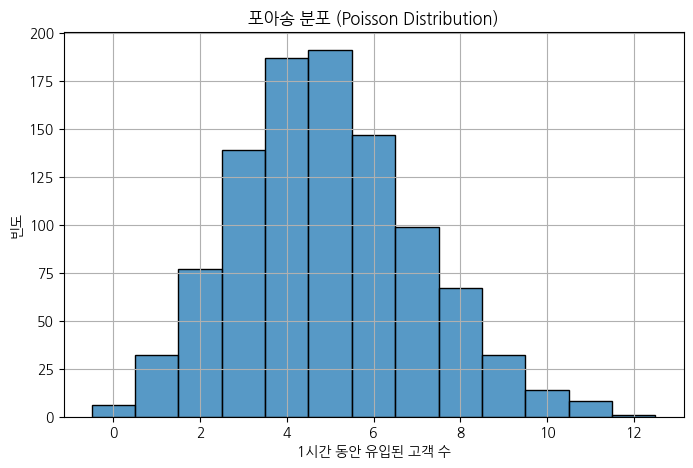

In [20]:
# 3. 포아송 분포 (Poisson Distribution) - 1시간 동안 유입되는 고객 수
poisson_data = poisson.rvs(mu=5, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(poisson_data, discrete=True, kde=False, bins=15)
plt.xlabel("1시간 동안 유입된 고객 수")
plt.ylabel("빈도")
plt.title("포아송 분포 (Poisson Distribution)")
plt.grid()
plt.show()

####**4. 정규 분포 (Normal Distribution)**  
→ 자연에서 가장 많이 나타나는 분포, 평균을 중심으로 대칭적

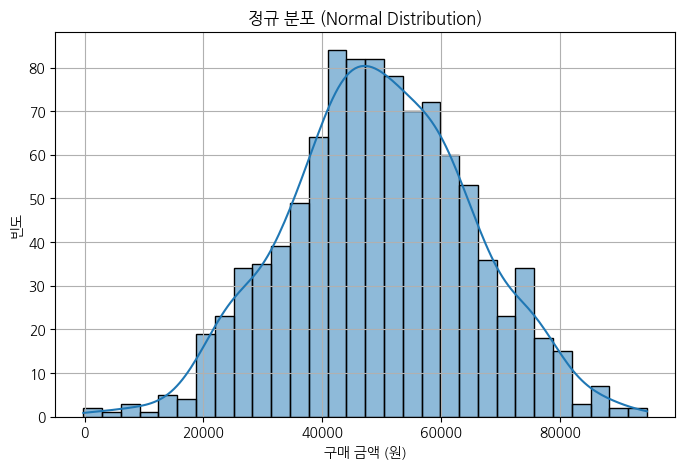

In [21]:
# 4. 정규 분포 (Normal Distribution) - 고객 평균 구매 금액
norm_data = norm.rvs(loc=50000, scale=15000, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(norm_data, kde=True, bins=30)
plt.xlabel("구매 금액 (원)")
plt.ylabel("빈도")
plt.title("정규 분포 (Normal Distribution)")
plt.grid()
plt.show()

####**5. 지수 분포 (Exponential Distribution)**  
→ 사건이 발생하는 시간 간격의 확률 모델
- 사건이 발생할 때까지 걸리는 시간을 모델링 (예: 고객 체류 시간)

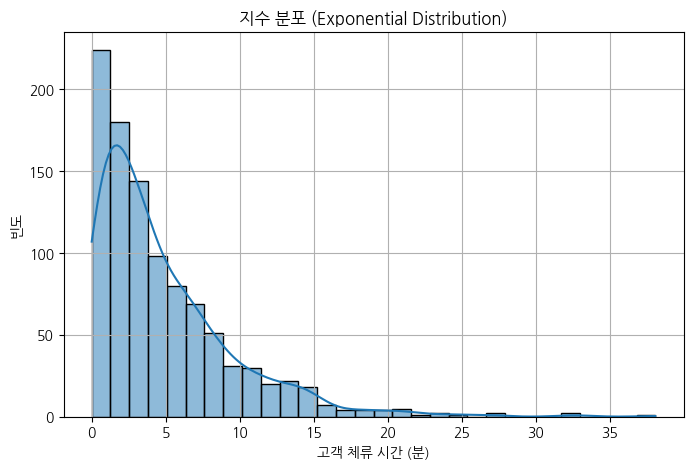

In [22]:
# 5. 지수 분포 (Exponential Distribution) - 고객의 체류 시간
expon_data = expon.rvs(scale=5, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(expon_data, kde=True, bins=30)
plt.xlabel("고객 체류 시간 (분)")
plt.ylabel("빈도")
plt.title("지수 분포 (Exponential Distribution)")
plt.grid()
plt.show()

####**6. 감마 분포 (Gamma Distribution)**  
→ 여러 개의 지수 분포를 합친 형태
- 고객 생애 구매 횟수 분석에 활용

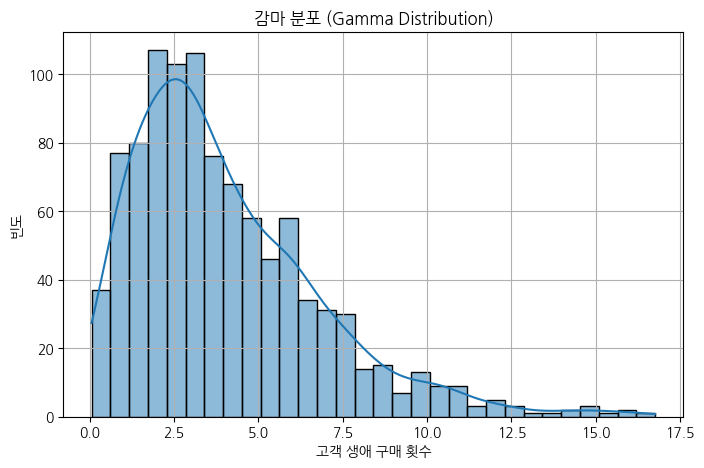

In [23]:
# 6. 감마 분포 (Gamma Distribution) - 고객 생애 구매 횟수
gamma_data = gamma.rvs(a=2, scale=2, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(gamma_data, kde=True, bins=30)
plt.xlabel("고객 생애 구매 횟수")
plt.ylabel("빈도")
plt.title("감마 분포 (Gamma Distribution)")
plt.grid()
plt.show()

####**7. 베타 분포 (Beta Distribution)**  
→ 0과 1 사이의 확률을 모델링 (예: 전환율 예측)

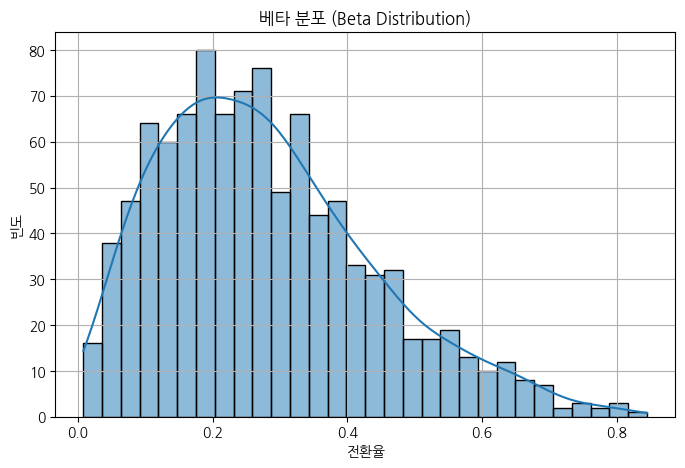

In [24]:
# 7. 베타 분포 (Beta Distribution) - 전환율 예측
beta_data = beta.rvs(a=2, b=5, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(beta_data, kde=True, bins=30)
plt.xlabel("전환율")
plt.ylabel("빈도")
plt.title("베타 분포 (Beta Distribution)")
plt.grid()
plt.show()



---



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   광고 클릭 여부   1000 non-null   int64  
 2   구매 여부      1000 non-null   int64  
 3   체류 시간 (분)  1000 non-null   float64
 4   생애 구매 횟수   1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None


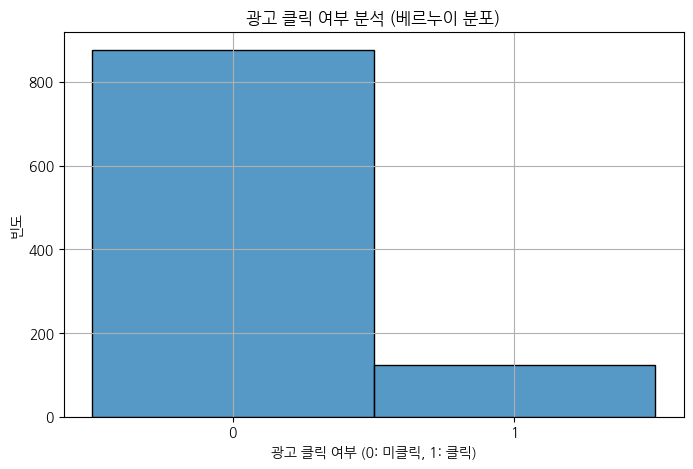

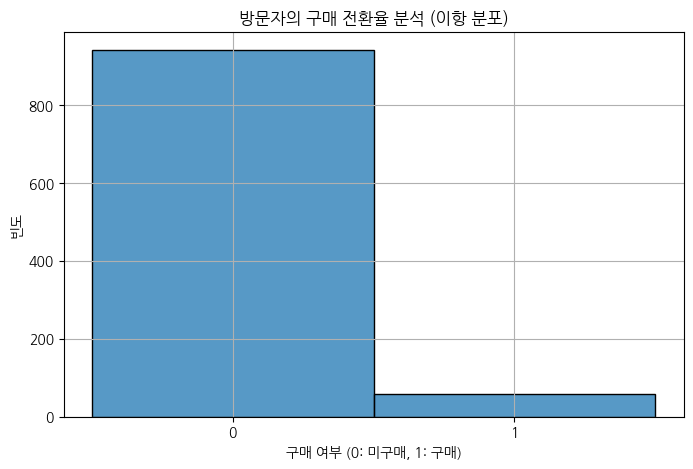

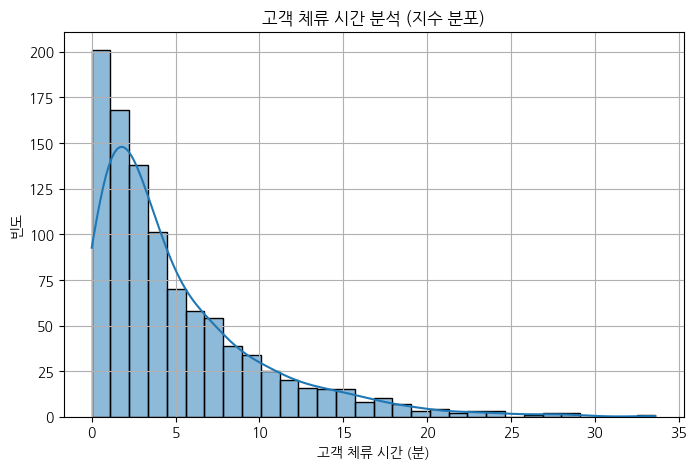

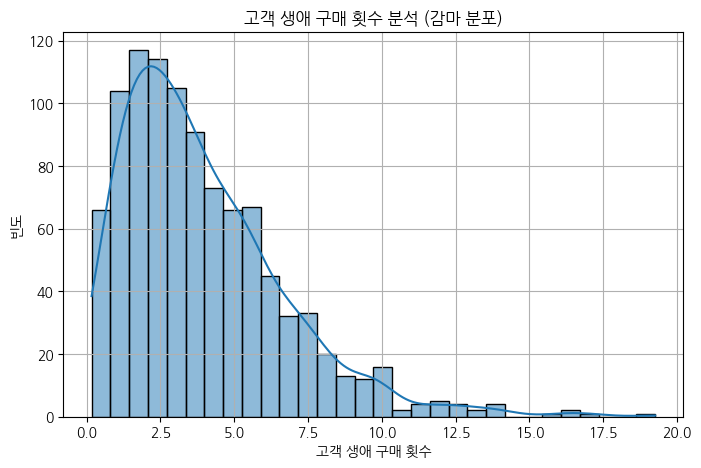

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
csv_filename = "ecommerce_customer_behavior.csv"
df_loaded = pd.read_csv(csv_filename)

# 데이터 정보 확인
print(df_loaded.info())

# 1. 광고 클릭률 분석 (베르누이 분포)
plt.figure(figsize=(8, 5))
sns.histplot(df_loaded["광고 클릭 여부"], discrete=True, kde=False, bins=2)
plt.xlabel("광고 클릭 여부 (0: 미클릭, 1: 클릭)")
plt.ylabel("빈도")
plt.title("광고 클릭 여부 분석 (베르누이 분포)")
plt.xticks([0, 1])
plt.grid()
plt.show()

# 2. 방문자 전환율 분석 (이항 분포)
plt.figure(figsize=(8, 5))
sns.histplot(df_loaded["구매 여부"], discrete=True, kde=False, bins=2)
plt.xlabel("구매 여부 (0: 미구매, 1: 구매)")
plt.ylabel("빈도")
plt.title("방문자의 구매 전환율 분석 (이항 분포)")
plt.xticks([0, 1])
plt.grid()
plt.show()

# 3. 고객 체류 시간 분석 (지수 분포)
plt.figure(figsize=(8, 5))
sns.histplot(df_loaded["체류 시간 (분)"], kde=True, bins=30)
plt.xlabel("고객 체류 시간 (분)")
plt.ylabel("빈도")
plt.title("고객 체류 시간 분석 (지수 분포)")
plt.grid()
plt.show()

# 4. 고객 생애 구매 횟수 분석 (감마 분포)
plt.figure(figsize=(8, 5))
sns.histplot(df_loaded["생애 구매 횟수"], kde=True, bins=30)
plt.xlabel("고객 생애 구매 횟수")
plt.ylabel("빈도")
plt.title("고객 생애 구매 횟수 분석 (감마 분포)")
plt.grid()
plt.show()



---

### **포아송 분포 (Poisson Distribution) 특징**

포아송 분포는 **단위 시간당 또는 단위 공간당 발생하는 사건의 개수를 확률적으로 모델링**할 때 사용  
예를 들어, **1시간 동안 들어오는 고객 수**, **웹사이트 방문 횟수**, **콜센터의 전화 수** 등과 같은 이산적인 이벤트 발생 수를 예측하는 데 적합

### **1. 정의**

- 포아송 분포는 **평균 발생 횟수(λ, 람다)가 주어졌을 때 특정 개수의 사건이 발생할 확률을 나타내는 분포**
- 확률 질량 함수 (PMF, Probability Mass Function):
    > 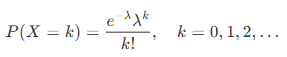
    
    여기서,
    
    - $X$ : 일정 시간 또는 공간 내에서 발생하는 사건의 개수
    - $\lambda$ : 단위 시간당 평균 사건 발생 횟수 (기대값, 평균)
    - $e$ : 자연로그 밑 (약 2.718)
    - $k!$ : k의 계승 (factorial

### **2. 포아송 분포의 특징**

### **1) 이산 확률 분포**

- 포아송 분포는 **이산형(discrete) 확률 분포**로, 사건 발생 횟수가 0, 1, 2, 3과 같은 정수값을 가짐

### **2) 평균과 분산이 동일**

- 포아송 분포의 평균과 분산은 동일하며, 둘 다 **λ**
    - **평균 (기대값)**:
        
        $E(X) = \lambda$
        
    - **분산**:
        
        $\text{Var}(X) = \lambda$
        
- 따라서 $\lambda$ 값이 클수록 데이터의 퍼짐도(변동성) 증가

### **3) 사건 발생이 독립적**

- 서로 다른 시간대 또는 공간에서 발생한 사건들은 **독립적**
    - 예: 오후 1시의 고객 유입 수는 오후 2시의 고객 유입 수와 관계없이 발생한다고 가정

### **4) 희귀 이벤트 모델링에 적합**

- 이벤트가 **드물게(rare)** 발생하는 경우를 모델링하는 데 유용
    - 예: 특정 질병이 하루에 몇 명에게 발병하는가?
    - 예: 공장에서 특정 결함이 발생하는 횟수

### **5) 단위 시간 또는 공간이 증가하면 정규 분포에 수렴**

- $\lambda$ 값이 커지면 포아송 분포는 **정규 분포에 근사**
    - 중심극한정리(CLT, Central Limit Theorem)에 의해 **큰 λ에서는 정규 분포와 유사한 형태**를 가짐

### **6) 포아송 과정 (Poisson Process)**

- 포아송 분포는 보통 **시간(또는 공간)에 따라 랜덤하게 발생하는 이벤트를 모델링**할 때 사용되며, 이 과정은 포아송 과정(Poisson Process)이라 부름
- 포아송 과정은 특정 단위 시간 내에서 사건이 발생할 확률이 일정하고, 각 사건이 독립적으로 발생하는 경우 적용됨

###**3. 포아송 분포 적용 사례**

1. **웹사이트 방문 분석**
    - 시간당 방문자 수를 모델링하여 트래픽 변화를 분석
2. **고객 유입 예측**
    - 매장에서 1시간 동안 도착하는 고객 수 예측 (그로스 마케팅 활용)
    - 아래 코드에서 관측된 시간당 평균 고객 방문수는 7

In [26]:
import numpy as np

# 설정: 매장 시간당 평균 고객 유입 수 (λ)
lambda_value = 7  # 시간당 평균 7명의 고객 방문

# 1시간 동안 도착하는 고객 수 예측 (포아송 분포 샘플링)
predicted_customers = np.random.poisson(lambda_value)

# 결과 출력
print(f"예측된 1시간 동안 도착하는 고객 수: {predicted_customers}")

예측된 1시간 동안 도착하는 고객 수: 10


In [27]:
# 여러 시간대 예측 (예: 10시간 동안의 고객 유입 수)
hours = 10
predicted_customers_per_hour = np.random.poisson(lambda_value, hours)

# 예측 결과 출력
print(f"각 시간대별 예측된 고객 수: {predicted_customers_per_hour}")
print(f"최소 고객 수: {predicted_customers_per_hour.min()}, 최대 고객 수: {predicted_customers_per_hour.max()}")
print(f"평균 고객 수: {predicted_customers_per_hour.mean():.2f}")

각 시간대별 예측된 고객 수: [ 1 10  2  5  6  9  7  6  9  6]
최소 고객 수: 1, 최대 고객 수: 10
평균 고객 수: 6.10


3. **콜센터 전화량 분석**
    - 시간당 들어오는 콜센터 전화 수 예측
4. **결함 검출**
    - 공장에서 시간당 발생하는 결함 제품 수 분석
5. **교통사고 발생 분석**
    - 특정 도로에서 하루 동안 발생하는 사고 횟수 분석

###**4. 포아송 분포 vs 다른 분포 비교**

| 분포 | 특징 | 주요 차이점 |
| --- | --- | --- |
| **이항 분포 (Binomial)** | 고정된 시행 횟수 nn과 성공 확률 pp이 있을 때 성공 횟수를 모델링 | 포아송 분포는 **무한한 시행 가능성**을 가정 (이항 분포는 고정된 nn) |
| **정규 분포 (Normal)** | 연속 확률 분포로 평균과 표준편차를 기반으로 확률 계산 | 포아송 분포는 **이산 분포**, λ가 크면 정규 분포에 수렴 |
| **지수 분포 (Exponential)** | 사건이 발생하는 **시간 간격**을 모델링 | 포아송 분포는 **시간 단위당 이벤트 개수**를 모델링 |

### **5. 정리**

- 포아송 분포는 단위 시간(공간)당 사건 발생 횟수를 모델링하는 데 사용됨
- 평균과 분산이 동일하며, 사건 발생이 독립적임
- 희귀 이벤트 분석 및 고객 유입, 트래픽 예측 등 다양한 실전 마케팅 분석에 활용 가능
- λ 값이 커지면 정규 분포에 수렴



---

다음의 주요 내용:

- 포아송 분포를 사용하여 고객 유입 수 데이터 생성
- 하루 동안의 고객 유입 수를 시뮬레이션 (시간 단위)
- 데이터 시각화 (히스토그램 및 시간별 추이)

    Hour  Customers
0      0          2
1      1          7
2      2          6
3      3          6
4      4          6
5      5          4
6      6          6
7      7         10
8      8          4
9      9          3
10    10          0
11    11          8
12    12          3
13    13          4
14    14          5
15    15          3
16    16          2
17    17          8
18    18          4
19    19          3
20    20          8
21    21          5
22    22          6
23    23          7


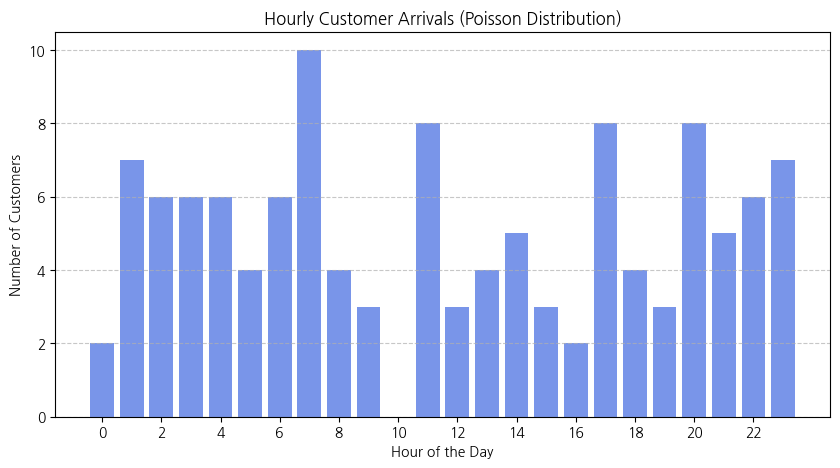

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 포아송 분포를 따르는 하루 동안의 고객 유입 데이터 생성 (λ = 평균 유입 고객 수)
lambda_value = 5  # 시간당 평균 5명의 고객이 유입됨
hours = 24  # 하루 24시간

# 각 시간대의 고객 유입 수를 포아송 분포에서 샘플링
customer_arrivals = np.random.poisson(lambda_value, hours)

# 데이터프레임 생성
df = pd.DataFrame({
    'Hour': np.arange(hours),
    'Customers': customer_arrivals
})

# 결과 출력
print(df)

# 시각화: 시간별 고객 유입 수
plt.figure(figsize=(10, 5))
plt.bar(df['Hour'], df['Customers'], color='royalblue', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')
plt.title('Hourly Customer Arrivals (Poisson Distribution)')
plt.xticks(np.arange(0, 24, 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. **포아송 분포 적용**
    - `np.random.poisson(lambda_value, hours)`를 사용하여 특정 시간대의 고객 유입량 생성
    - 여기서 `lambda_value=5`는 시간당 평균 고객 유입 수
2. **데이터 시각화**
    - `bar plot`을 사용하여 시간별 고객 유입량 표현
    - 하루 동안의 특정 시간대에 고객 유입량이 어떻게 변화하는지 확인할 수 있음
3. **활용 방안**
    - 이 모델을 통해 특정 시간대의 유입 패턴을 파악하고, 마케팅 전략을 최적화할 수 있음
    - 예를 들어, 고객 유입이 적은 시간대에는 할인 이벤트를 진행하거나 광고 집중




---


---

##**통계적 분석을 통한 마케팅 성과 예측**

**통계적 분석을 통한 마케팅 성과 예측의 종류**

마케팅 성과 예측은 통계적 분석 기법을 활용하여 고객 반응과 매출 성과를 예측하는 과정  
이를 통해 기업은 마케팅 전략을 최적화하고 예산을 효과적으로 배분

### **1. 회귀 분석 (Regression Analysis)**

회귀 분석은 마케팅 요소(광고비, 고객 참여도 등)와 성과(매출, 구매 전환율 등) 간의 관계를 분석하는 대표적인 방법

####**단순 회귀 분석 (Simple Regression Analysis)**

하나의 독립 변수(X)가 종속 변수(Y)에 미치는 영향을 분석하는 방법

예를 들어 광고비(X)와 매출(Y)의 관계를 분석할 수 있음

활용 예시: 광고비를 100만 원 증가시켰을 때 예상 매출이 얼마나 증가하는지 예측

####**다중 회귀 분석 (Multiple Regression Analysis)**

여러 개의 독립 변수(X1, X2, X3...)가 종속 변수(Y)에 미치는 영향을 분석하는 방법

예를 들어 광고비, 방문자 수, 소셜 미디어 반응이 매출에 미치는 영향을 분석할 수 있음

활용 예시: 광고비뿐만 아니라 SNS 활동, 이메일 마케팅이 매출 증가에 미치는 영향을 종합적으로 분석

###**2. 시계열 분석 (Time Series Analysis)**  
시계열 분석은 일정 기간 동안의 데이터를 기반으로 미래 성과를 예측하는 방법

####**이동 평균법 (Moving Average)**

과거 일정 기간 동안의 데이터를 평균 내어 미래 값을 예측하는 방식

예를 들어 지난 6개월간의 월별 매출 평균을 기반으로 다음 달 예상 매출을 계산할 수 있음

활용 예시: 성수기와 비수기의 패턴을 분석하여 적절한 광고 예산 책정

####**ARIMA (AutoRegressive Integrated Moving Average)**

과거의 패턴과 추세를 분석하여 미래 값을 예측하는 대표적인 시계열 모델

예를 들어 매월 발생하는 매출 데이터를 학습하여 다음 달 매출을 예측할 수 있음

활용 예시: 계절별 마케팅 전략을 수립하는 데 활용. 예를 들어 연말 프로모션의 효과를 사전에 예측

###**3. 로지스틱 회귀 분석 (Logistic Regression Analysis)**

로지스틱 회귀 분석은 특정 마케팅 캠페인이 성공할 확률을 예측하는 데 활용

예를 들어 이메일 마케팅을 발송했을 때 고객이 제품을 구매할 확률을 예측할 수 있음

활용 예시: 이메일 제목이나 광고 문구에 따라 구매 전환율이 증가하는 패턴 분석

###**4. 군집 분석 (Clustering Analysis)**  
군집 분석은 유사한 고객 그룹을 묶어 마케팅 전략을 차별화하는 방법

####**K-평균 군집화 (K-Means Clustering)**

고객을 비슷한 성향(소비 패턴, 관심사 등)으로 그룹화하여 타겟 마케팅을 실행하는 방식

예를 들어 VIP 고객, 일반 고객, 신규 고객으로 나누어 맞춤형 프로모션을 적용할 수 있음

활용 예시: VIP 고객에게는 추가 혜택을 제공하고, 신규 고객에게는 웰컴 쿠폰 제공

####**계층적 군집 분석 (Hierarchical Clustering)**

고객 데이터를 계층적으로 묶어 고객을 세분화하는 방식

예를 들어 온라인 쇼핑몰에서 구매 이력을 기반으로 고객을 그룹화할 수 있음

활용 예시: 고객 세분화를 통해 맞춤형 광고 콘텐츠 제공

###**5. 감성 분석 (Sentiment Analysis)**

감성 분석은 고객 리뷰나 SNS 데이터를 분석하여 제품이나 브랜드에 대한 감정을 파악하는 기법

예를 들어 고객 리뷰를 분석하여 긍정/부정 감정을 판단하고, 이를 통해 제품 개선 방향을 도출할 수 있음

활용 예시: 부정적인 피드백이 많다면 서비스 개선이 필요하며, 긍정적인 리뷰가 많은 광고 요소를 강조하여 마케팅 강화

###**6. 생존 분석 (Survival Analysis)**

생존 분석은 고객 이탈률(Churn Rate)을 분석하여 고객 유지 전략을 수립하는 기법

예를 들어 특정 기간 동안 고객이 서비스를 계속 사용할 확률을 예측할 수 있음

활용 예시: 구독 기반 서비스에서 고객 이탈 위험이 높은 그룹을 식별하여 맞춤형 유지 캠페인 실행

###**7. 의사결정나무 및 랜덤 포레스트 (Decision Tree & Random Forest)**

의사결정나무 모델과 랜덤 포레스트는 마케팅 요소가 고객 행동에 미치는 영향을 분석하는 데 유용

####**의사결정나무 (Decision Tree)**

고객이 구매할 가능성이 높은 조건을 시각적으로 분석하는 방법

예를 들어 30대 여성 중 SNS 참여도가 높은 고객이 특정 브랜드 제품을 구매할 확률이 높은지 분석할 수 있음

활용 예시: 고객 데이터를 기반으로 맞춤형 마케팅 캠페인 진행

####**랜덤 포레스트 (Random Forest)**

여러 개의 의사결정나무를 결합하여 더 정확한 예측을 수행하는 방법

예를 들어 고객의 과거 구매 기록을 바탕으로 추천 시스템을 구축할 수 있음

활용 예시: 고객 맞춤형 상품 추천을 제공하여 매출 증대



---

마케팅 성과 예측에는 다양한 통계적 분석 방법이 활용됨

회귀 분석을 통해 광고비와 매출의 관계를 분석하고, 시계열 분석을 활용해 미래 성과를 예측하며, 로지스틱 회귀 분석을 통해 캠페인의 성공 확률을 계산할 수 있음

또한 군집 분석을 통해 고객을 세분화하여 맞춤형 마케팅을 수행할 수 있으며, 감성 분석을 통해 브랜드 이미지와 고객 만족도를 개선할 수 있음

이러한 기법을 적절히 활용하면 기업은 마케팅 예산을 최적화하고, 보다 효과적인 마케팅 전략을 수립할 수 있음

###**시나리오: 마케팅 캠페인의 성과 예측을 위한 데이터 분석**

**배경**

B 기업은 최근 온라인 마케팅 캠페인을 진행했으며, 광고비, 이메일 마케팅 반응률, 고객 리뷰 점수를 기반으로 캠페인의 성과를 예측하고자 합니다. 마케팅팀은 이 데이터를 활용하여 향후 어떤 요소가 가장 중요한 영향을 미치는지 분석하고, 마케팅 전략을 최적화하는 것이 목표입니다.

**문제 정의**

마케팅 캠페인의 효과를 극대화하기 위해, 광고비, 이메일 마케팅 반응률, 고객 리뷰 점수와 매출 간의 관계를 분석하여 예측 모델을 구축해야 합니다. 이를 통해 미래 성과를 예측하고, 마케팅 전략을 데이터 기반으로 개선할 수 있습니다.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                     매출   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1983.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           2.24e-09
Time:                        04:44:40   Log-Likelihood:                -19.160
No. Observations:                  10   AIC:                             46.32
Df Residuals:                       6   BIC:                             47.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.3507     43.820     -1.537      0.1

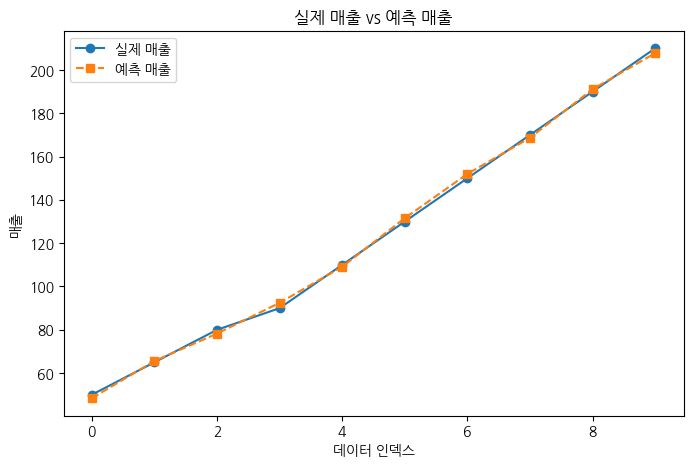

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: 데이터 생성 (광고비, 이메일 마케팅 반응률, 고객 리뷰 점수 -> 매출)
data = {
    "광고비": [500, 700, 800, 1000, 1200, 1500, 1800, 2000, 2300, 2500],
    "이메일반응률": [3.1, 3.8, 4.2, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5],
    "고객리뷰점수": [4.0, 4.2, 4.5, 4.6, 4.8, 5.0, 5.1, 5.3, 5.5, 5.7],
    "매출": [50, 65, 80, 90, 110, 130, 150, 170, 190, 210]
}

df = pd.DataFrame(data)

# Step 2: 독립 변수 (X)와 종속 변수 (y) 설정
X = df[["광고비", "이메일반응률", "고객리뷰점수"]]
y = df["매출"]

# Step 3: 상수 추가 (회귀 모델에 필요)
X = sm.add_constant(X)

# Step 4: 회귀 모델 생성 및 학습
model = sm.OLS(y, X).fit()

# Step 5: 모델 요약 출력
print(model.summary())

# Step 6: 예측값 생성
df["예측매출"] = model.predict(X)

# Step 7: 실제 매출 vs 예측 매출 비교 그래프
plt.figure(figsize=(8, 5))
plt.plot(df["매출"], label="실제 매출", marker='o')
plt.plot(df["예측매출"], label="예측 매출", linestyle='--', marker='s')
plt.xlabel("데이터 인덱스")
plt.ylabel("매출")
plt.legend()
plt.title("실제 매출 vs 예측 매출")
plt.show()

### **설명**

1. **Step 1: 데이터 생성**
    - B 기업의 마케팅 성과 데이터를 활용하여 광고비, 이메일 반응률, 고객 리뷰 점수를 기반으로 매출 데이터를 생성합니다.
2. **Step 2: 독립 변수(X)와 종속 변수(y) 설정**
    - 광고비, 이메일 마케팅 반응률, 고객 리뷰 점수를 독립 변수로 설정하고, 매출을 종속 변수로 설정합니다.
3. **Step 3: 상수 추가**
    - `sm.add_constant(X)`를 사용하여 회귀 모델에 절편을 추가합니다.
4. **Step 4: 회귀 모델 생성 및 학습**
    - `statsmodels` 라이브러리의 `OLS`(Ordinary Least Squares)를 활용하여 다중 회귀 분석을 수행합니다.
5. **Step 5: 모델 요약 출력**
    - `model.summary()`를 출력하여 회귀 계수, R-squared 값, p-value 등을 확인합니다.
6. **Step 6: 예측값 생성**
    - 학습된 모델을 사용하여 예측된 매출 값을 데이터프레임에 추가합니다.
7. **Step 7: 실제 매출 vs 예측 매출 비교**
    - 실제 매출과 예측 매출을 시각적으로 비교하여 모델의 성능을 평가합니다.

### **예측 결과 해석**

- **R-squared 값**: 모델이 데이터를 얼마나 잘 설명하는지 나타내며, 값이 1에 가까울수록 예측력이 높음을 의미합니다.
- **p-value**: 개별 변수(광고비, 이메일 반응률, 고객 리뷰 점수)가 매출에 미치는 영향이 유의미한지 판단합니다.
    - p-value가 0.05 미만이면 해당 변수가 통계적으로 유의미함을 의미합니다.
- **회귀 계수(β 값)**:
    - 예를 들어 광고비의 회귀 계수가 0.08이라면, 광고비를 100 증가시킬 경우 매출이 8만큼 증가하는 경향이 있음을 나타냅니다.
    - 이메일 반응률과 고객 리뷰 점수가 매출에 미치는 영향을 분석하여, 마케팅 전략 수립 시 어떤 요소에 집중해야 하는지 판단할 수 있습니다.

이 분석을 통해 B 기업은 다음과 같은 인사이트를 얻을 수 있습니다.

1. **광고비**를 증가시킬 경우 매출 증가에 얼마나 기여하는지 확인할 수 있습니다.
2. **이메일 반응률**이 높을수록 매출이 증가하는지 분석하여, 이메일 마케팅의 효과를 정량적으로 평가할 수 있습니다.
3. **고객 리뷰 점수**가 매출에 미치는 영향을 확인하고, 리뷰 개선 전략을 세울 수 있습니다.



---

###**시나리오: 시계열 분석을 활용한 마케팅 성과 예측**

**배경**

C 기업은 지난 3년간의 월별 매출 데이터를 보유하고 있으며, 이를 활용하여 향후 매출을 예측하고자 한다. 특히, 연말 프로모션과 같은 특정 시점에서 매출이 급증하는 패턴을 분석하여 효과적인 마케팅 전략을 수립하는 것이 목표이다.

**문제 정의**

C 기업은 성수기와 비수기의 패턴을 분석하여 광고 예산을 최적화하고, 향후 매출을 예측하여 프로모션 전략을 수립하고자 한다. 이를 위해 시계열 분석 기법인 이동 평균법과 ARIMA 모델을 활용하여 다음 달의 매출을 예측한다.

<ipython-input-30-99aa13b9eab5>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2021-01", periods=36, freq="M")
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-30-99aa13b9eab5>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=4, fr

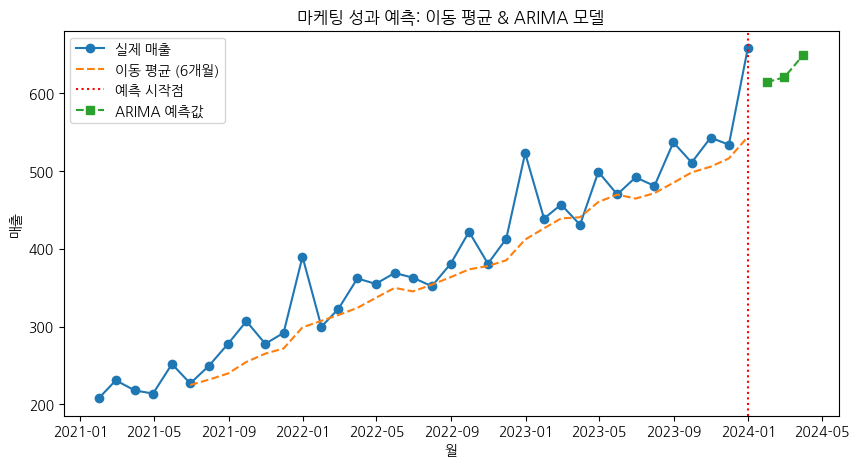

향후 3개월 매출 예측 (ARIMA 모델):
2024-01-31    614.305927
2024-02-29    620.696676
2024-03-31    649.321907
Freq: ME, Name: predicted_mean, dtype: float64


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Step 1: 데이터 생성 (월별 매출 데이터 - 지난 36개월치)
np.random.seed(42)
months = pd.date_range(start="2021-01", periods=36, freq="M")
sales = [200 + 10 * i + np.random.randint(-30, 30) for i in range(36)]  # 기본 증가 패턴 + 랜덤 변동
sales[11] += 100  # 연말 프로모션 효과 (12월)
sales[23] += 80   # 연말 프로모션 효과 (12월)
sales[35] += 90   # 연말 프로모션 효과 (12월)

df = pd.DataFrame({"월": months, "매출": sales})
df.set_index("월", inplace=True)

# Step 2: 이동 평균법 (Moving Average) 적용
df["이동평균_6개월"] = df["매출"].rolling(window=6).mean()

# Step 3: ARIMA 모델 학습 및 예측
model = ARIMA(df["매출"], order=(2, 1, 2))  # ARIMA(2,1,2) 모델 설정
model_fit = model.fit()
forecast = model_fit.forecast(steps=3)  # 향후 3개월 예측

# Step 4: 시각화
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["매출"], label="실제 매출", marker="o")
plt.plot(df.index, df["이동평균_6개월"], label="이동 평균 (6개월)", linestyle="--")
plt.axvline(x=df.index[-1], color='r', linestyle="dotted", label="예측 시작점")
plt.plot(pd.date_range(start=df.index[-1], periods=4, freq="M")[1:], forecast, label="ARIMA 예측값", linestyle="dashed", marker="s")
plt.xlabel("월")
plt.ylabel("매출")
plt.legend()
plt.title("마케팅 성과 예측: 이동 평균 & ARIMA 모델")
plt.show()

# Step 5: 예측 결과 출력
print("향후 3개월 매출 예측 (ARIMA 모델):")
print(forecast)

### **설명**

1. **Step 1: 데이터 생성**
    - C 기업의 지난 36개월(3년간) 월별 매출 데이터를 생성한다.
    - 매출 데이터는 점진적으로 증가하는 패턴을 가지며, 연말(12월)에 프로모션 효과로 인한 급증 현상이 반영되어 있다.
2. **Step 2: 이동 평균법 적용**
    - 6개월 동안의 이동 평균을 계산하여 매출 변동 패턴을 확인한다.
    - 성수기와 비수기의 변화 흐름을 쉽게 분석할 수 있다.
3. **Step 3: ARIMA 모델 학습 및 예측**
    - ARIMA(2,1,2) 모델을 활용하여 향후 3개월간의 매출을 예측한다.
    - 데이터의 시계열적 특성을 반영하여 예측 정확도를 높인다.
4. **Step 4: 시각화**
    - 실제 매출과 이동 평균을 그래프로 나타내어 전체적인 흐름을 확인한다.
    - ARIMA 모델의 예측 결과를 추가하여 향후 매출 변동을 예상할 수 있도록 한다.
5. **Step 5: 예측 결과 출력**
    - 향후 3개월간의 예상 매출을 출력하여 마케팅팀이 프로모션 전략을 세우는 데 활용할 수 있도록 한다.

### **예측 결과 해석**

- 이동 평균을 통해 성수기(연말)와 비수기의 매출 패턴을 시각적으로 확인할 수 있다.
- ARIMA 모델을 적용하여 향후 3개월의 매출을 예측할 수 있으며, 이를 바탕으로 마케팅 전략을 조정할 수 있다.
- 예측된 매출이 증가하는 경우, 광고비를 추가 투자하여 캠페인의 효과를 극대화할 수 있다.
- 반대로 예측된 매출이 감소하는 경우, 특정 할인 프로모션을 실행하여 매출을 증가시킬 방안을 모색할 수 있다.

C 기업은 이동 평균과 ARIMA 모델을 활용하여 향후 매출을 예측하고, 이를 바탕으로 최적의 마케팅 전략을 수립할 수 있다. 이러한 시계열 분석을 통해 기업은 데이터 기반 의사결정을 내릴 수 있으며, 시즌별 성과 분석을 통해 효과적인 마케팅 예산을 운영할 수 있다.



---

### **시나리오: 로지스틱 회귀 분석을 활용한 마케팅 캠페인 성과 예측**

**배경**

D 기업은 최근 이메일 마케팅 캠페인을 진행하며, 고객의 이메일 반응이 실제 구매로 이어지는지 분석하고자 한다.

이메일 제목, 할인율, 클릭 여부 등의 데이터를 활용하여 고객이 제품을 구매할 확률을 예측하는 것이 목표이다.

**문제 정의**

D 기업은 이메일 마케팅 캠페인의 성공 가능성을 예측하여, 향후 마케팅 전략을 최적화하고 전환율을 극대화하려 한다.

이를 위해 로지스틱 회귀 분석을 활용하여 고객의 구매 여부(0 또는 1)를 예측하는 모델을 구축한다.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


모델 정확도: 0.70

혼동 행렬:
[[28  0]
 [12  0]]

분류 보고서:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        28
           1       0.00      0.00      0.00        12

    accuracy                           0.70        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.49      0.70      0.58        40



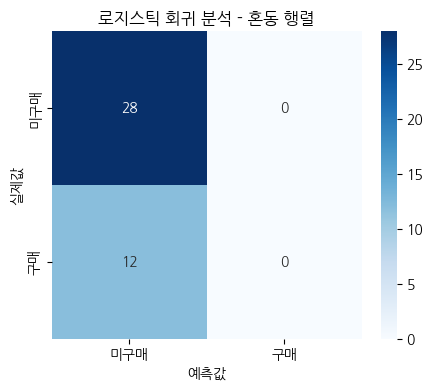

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: 데이터 생성 (이메일 캠페인 관련 변수 -> 구매 여부 예측)
np.random.seed(42)
data = {
    "이메일제목길이": np.random.randint(20, 80, 200),  # 이메일 제목의 글자 수
    "할인율": np.random.uniform(0, 50, 200),  # 할인율(%)
    "이메일클릭여부": np.random.choice([0, 1], size=200, p=[0.6, 0.4]),  # 이메일 클릭 여부 (0: 클릭 안함, 1: 클릭)
    "구매여부": np.random.choice([0, 1], size=200, p=[0.7, 0.3])  # 구매 여부 (0: 미구매, 1: 구매)
}

df = pd.DataFrame(data)

# Step 2: 독립 변수(X)와 종속 변수(y) 설정
X = df[["이메일제목길이", "할인율", "이메일클릭여부"]]
y = df["구매여부"]

# Step 3: 데이터 분할 (훈련 데이터 80%, 테스트 데이터 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: 예측 수행
y_pred = model.predict(X_test)

# Step 6: 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"모델 정확도: {accuracy:.2f}")
print("\n혼동 행렬:")
print(conf_matrix)
print("\n분류 보고서:")
print(report)

# Step 7: 시각화 (혼동 행렬)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["미구매", "구매"], yticklabels=["미구매", "구매"])
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("로지스틱 회귀 분석 - 혼동 행렬")
plt.show()

### **설명**

1. **Step 1: 데이터 생성**
    - 이메일 제목 길이, 할인율, 이메일 클릭 여부 등의 데이터를 생성한다.
    - 이메일 캠페인이 고객 구매로 이어졌는지(구매 여부)를 종속 변수로 설정한다.
2. **Step 2: 독립 변수(X)와 종속 변수(y) 설정**
    - 이메일 제목 길이, 할인율, 이메일 클릭 여부를 독립 변수로 설정한다.
    - 구매 여부(0: 미구매, 1: 구매)를 종속 변수로 설정하여 예측할 수 있도록 한다.
3. **Step 3: 데이터 분할**
    - 전체 데이터를 80% 훈련 데이터, 20% 테스트 데이터로 분할하여 모델 성능을 평가할 수 있도록 한다.
4. **Step 4: 로지스틱 회귀 모델 생성 및 학습**
    - `LogisticRegression`을 활용하여 로지스틱 회귀 모델을 학습한다.
5. **Step 5: 예측 수행**
    - 학습된 모델을 활용하여 테스트 데이터의 구매 여부를 예측한다.
6. **Step 6: 모델 평가**
    - 정확도(Accuracy), 혼동 행렬(Confusion Matrix), 분류 보고서(Classification Report)를 출력하여 모델 성능을 평가한다.
7. **Step 7: 시각화**
    - 혼동 행렬을 시각화하여 실제 구매 여부와 예측값 간의 비교를 확인한다.

### **예측 결과 해석**

- 모델의 **정확도(Accuracy)** 를 통해 이메일 캠페인의 성공 여부를 예측하는 모델의 성능을 확인할 수 있다.
- **혼동 행렬(Confusion Matrix)** 을 통해 모델이 실제 구매(1)를 얼마나 정확히 예측했는지 확인할 수 있다.
- **할인율**과 **이메일 클릭 여부**가 구매 여부에 미치는 영향을 분석하여 마케팅 전략을 최적화할 수 있다.
- 예를 들어, 이메일을 클릭한 고객의 구매 확률이 높다면, 이메일 클릭을 유도하는 전략(제목 최적화, 할인 쿠폰 제공 등)을 강화할 수 있다.

D 기업은 로지스틱 회귀 분석을 통해 이메일 캠페인의 성과를 예측하고, 고객의 구매 가능성을 평가할 수 있다.

이러한 분석 결과를 바탕으로, 이메일 제목 길이 최적화, 적절한 할인율 설정, 이메일 클릭을 유도하는 전략을 강화하여 마케팅 효과를 극대화할 수 있다.



---

### **시나리오: BERT 임베딩을 활용한 감성 분석을 통한 마케팅 성과 예측**

**배경**

E 기업은 고객의 제품 리뷰와 SNS 댓글을 분석하여 브랜드에 대한 감정을 파악하고자 한다.

특히, 긍정적인 피드백이 많은 제품의 마케팅을 강화하고, 부정적인 피드백이 많은 제품에 대한 개선 방향을 수립하는 것이 목표이다.

**문제 정의**

E 기업은 고객 리뷰를 분석하여 긍정적/부정적 감정을 자동으로 분류하고, 이를 바탕으로 마케팅 전략을 최적화하려 한다.

이를 위해 BERT 임베딩을 활용하여 감성 분석을 수행하고, 제품과 브랜드에 대한 감정을 데이터 기반으로 평가한다.

In [32]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from scipy.special import softmax
import pandas as pd

# Step 1: BERT 모델 및 토크나이저 로드
MODEL_NAME = "nlptown/bert-base-multilingual-uncased-sentiment"  # 다국어 감성 분석 모델
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME)

# Step 2: 샘플 댓글 데이터 생성
data = {
    "댓글": [
        "이 제품 정말 좋아요! 완전 만족합니다.",
        "배송이 너무 느려요. 다시는 안 살 거예요.",
        "가격 대비 성능이 훌륭합니다. 추천해요!",
        "포장이 엉망이었어요. 기분이 나빴습니다.",
        "고객 서비스가 훌륭했어요! 빠르게 해결해 줬어요."
    ]
}

df = pd.DataFrame(data)

# Step 3: 감성 분석 함수 정의
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    scores = softmax(outputs.logits.numpy())[0]  # 확률값 변환
    sentiment_score = scores.argmax()  # 가장 높은 점수의 인덱스 선택 (0~4)

    # BERT 감성 분석 모델 기준 (0: 매우 부정, 1: 부정, 2: 중립, 3: 긍정, 4: 매우 긍정)
    sentiment_labels = ["매우 부정", "부정", "중립", "긍정", "매우 긍정"]
    return sentiment_labels[sentiment_score], scores[sentiment_score]  # 감정 라벨 및 확률값 반환

# Step 4: 댓글 감성 분석 수행
df["감정"], df["확률"] = zip(*df["댓글"].apply(predict_sentiment))

# Step 5: 감성 분석 결과 출력
print("감정분석결과")
display(df)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

감정분석결과


,댓글,감정,확률
0,이 제품 정말 좋아요! 완전 만족합니다.,매우 긍정,0.716481
1,배송이 너무 느려요. 다시는 안 살 거예요.,중립,0.406511
2,가격 대비 성능이 훌륭합니다. 추천해요!,매우 긍정,0.564817
3,포장이 엉망이었어요. 기분이 나빴습니다.,매우 부정,0.423851
4,고객 서비스가 훌륭했어요! 빠르게 해결해 줬어요.,매우 긍정,0.690134


### **설명**

1. **Step 1: BERT 모델 및 토크나이저 로드**
    - `nlptown/bert-base-multilingual-uncased-sentiment` 모델을 사용하여 다국어 감성 분석을 수행한다.
    - 한국어, 영어 등 여러 언어의 감정을 분석할 수 있다.
2. **Step 2: 샘플 댓글 데이터 생성**
    - 고객의 리뷰 및 SNS 댓글 샘플 데이터를 생성한다.
    - 긍정적, 부정적, 중립적인 리뷰를 포함한다.
3. **Step 3: 감성 분석 함수 정의**
    - BERT 토크나이저를 사용하여 입력 텍스트를 토큰화하고, 모델을 통해 감정을 예측한다.
    - 모델의 출력값을 `softmax` 함수를 통해 감정 확률로 변환한다.
    - 5단계 감정 분류(매우 부정 ~ 매우 긍정)로 분류한다.
4. **Step 4: 댓글 감성 분석 수행**
    - 각 댓글을 분석하여 감정 라벨과 확률값을 반환한다.
5. **Step 5: 감성 분석 결과 출력**
    - 데이터프레임을 출력하여 댓글별 감성 분석 결과를 확인할 수 있다.

### **예측 결과 해석**

- **긍정적인 리뷰**가 많으면 해당 제품의 광고를 강화하고, 고객 후기를 적극 활용할 수 있다.
- **부정적인 리뷰**가 많으면 고객 불만 사항을 분석하고, 제품 및 서비스 개선 전략을 수립해야 한다.
- 예를 들어 "배송이 너무 느려요"와 같은 부정적인 피드백이 많다면 물류 프로세스를 개선하는 방향으로 마케팅 전략을 수정할 수 있다.

E 기업은 BERT 기반 감성 분석을 활용하여 고객 리뷰 및 SNS 데이터를 분석하고, 이를 통해 마케팅 전략을 최적화할 수 있다.

이러한 감성 분석을 통해 긍정적인 리뷰를 강조한 마케팅을 진행하고, 부정적인 리뷰의 원인을 분석하여 서비스 개선에 활용할 수 있다.



---

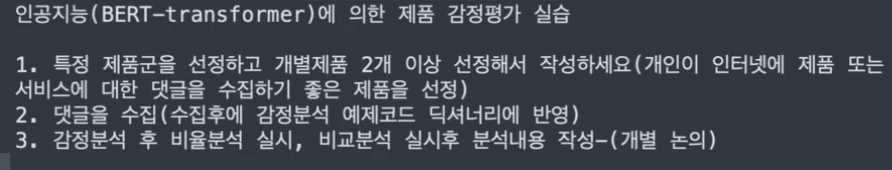

###**키보드 비교**

In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from scipy.special import softmax
import pandas as pd

# Step 1: BERT 모델 및 토크나이저 로드
MODEL_NAME = "nlptown/bert-base-multilingual-uncased-sentiment"  # 다국어 감성 분석 모델
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME)

# Step 2: 샘플 댓글 데이터 생성
data = {
    "keychron": [
        "기존 키보드에 비해 좀 무거워요..그래도 저는 뭔가 안정감이 느껴져서 괜찮아요.",
        "남편은 게임을 좋아해서 열심히 두드려도 소리가 크게 나지 않더라구요. 내심 부러웠는데 사용하게 되서 너무 좋아요.",
        "너무 편하다 진짜 쫀득한 키감 최고!!",
        "다른 키보드에 비해 가격이 있는 편이라 부담스럽긴 합니다. 하지만 이러한 단점을 충분히 커버쳐주는 장점들이 많습니다.",
        "블루투스 아주 깔끔하게 연결가능해요. 편해요.",
        "와 진짜 부드러워요. 조용하게 타이핑할수 있어서 너무 좋아요!",
        "기계식 키보드 입문자에게 강력 추천합니다 !",
        "살짝 무거감이 있어요. 휴대용으로는 좀 불편할 수 있어요.",
        "타이핑 오래해도 손가락 피로감이 덜 한 것이 아주 마음에 들어요!",
        "디자인과 기능이 모두 만족스러워요.",
        "입력되는 속도가 민감(?)해서 오타가 쉽게 나는 느낌이에요.",
        "큰 키보드 소리에 민감하신 분들에게 추천드립니다.",
        "전체적으로 만족스러운 키보드이고 큰 고장 없는 한 쭉 사용할 것 같아요!",
        "풀배열 키보드라 사용하기 아주 편해요.",
        "곡률이 져있어 손목에 가는 피로도가 낮아져요.",
        "세련되고 만능의 기능을 보유한 기계식 키보드라 좋습니다.",
        "알루미늄 소재라 무게가 상당합니다. 너무 무거워요.",
        "마감 품질면에서 조금 아쉬웠어요.",
        "케이블로 연결해서 써보니 1.2m는 애매하게 짧아요.",
        "가성비 좋은 키보드라 추천할 만한 제품이지만, 소프트웨어적인 부분에서는 부족할 수 있습니다."
    ],
    "abko": [
        "키보드 각도 조절을 할 수 있어서 손목이 편안해요.",
        "일반 키보드와 달리 폰트가 달라서 전체적으로 귀여운 디자인이에요.",
        "키캄이 좋고 소음이 적은 키보드 찾고 있었는데 딱이에요! 추천합니다.",
        "디자인이 너무나 이쁘고 부드러운 타견감이 좋아요",
        "무게감이 있어 이동할때 너무 불편해요..",
        "게임용으로 제작된 키보드지만 사무용으로도 손색이 없습니다.",
        "높이가 있어 손목 보호대 없이 사용하면 불편..실망이네요.",
        "타이핑할 때 손맛도 있고 소리도 거슬리지 않는 정도라 사용하기 좋아요",
        "플라스틱 마감이 살짝 저렴해 보이는 느낌이 있긴 해요.",
        "가성비 키보드 찾으시는 분들에게 추천드려요.",
        "키보드에 은은하게 빛나는 무지개빛 라이트가 아주 이뻐요.",
        "사용하던 키보드와 배열이 약간 달라서 오타가 좀 나네요..",
        "무거워요. 별로네요.",
        "소프트웨어적인 부분에서 많이 부족하네요.",
        "스페이스 바 키가 좀 뻑뻑하게 눌리는 것 같아 아쉽네요..",
        "완전 조용한건 아니고, 적당한 소음 있습니다.",
        "특별히 인체공학적이고 그렇지는 않습니다. 실망입니다.",
        "하단에 높낮이 조절 받침대가 탑재되어 있어서 손목 각도에 맞게 편하게 사용 가능해요.",
        "멤브레인 방식이기 때문에 기계식 기보드에 비해 반응 속도가 느려요. 아쉽네요.",
        "키캡이 높다보니 살짝 어색하고 손가락이 피곤해요."
    ]
}

df = pd.DataFrame(data)

# Step 3: 감성 분석 함수 정의
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    scores = softmax(outputs.logits.numpy())[0]  # 확률값 변환
    sentiment_score = scores.argmax()  # 가장 높은 점수의 인덱스 선택 (0~4)

    # BERT 감성 분석 모델 기준 (0: 매우 부정, 1: 부정, 2: 중립, 3: 긍정, 4: 매우 긍정)
    sentiment_labels = ["매우 부정", "부정", "중립", "긍정", "매우 긍정"]
    return sentiment_labels[sentiment_score], scores[sentiment_score]  # 감정 라벨 및 확률값 반환

# Step 4: 댓글 감성 분석 수행
df["키크론_감정"], df["키크론_확률"] = zip(*df["keychron"].apply(predict_sentiment))
df["엡코_감정"], df["엡코_확률"] = zip(*df["abko"].apply(predict_sentiment))

# Step 5: 감성 분석 결과 출력
print("키크론 키보드 감정분석결과"), display(df[["keychron", "키크론_감정", "키크론_확률"]])
print("엡코 키보드 감정분석결과"), display(df[["abko", "엡코_감정", "엡코_확률"]])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

키크론 키보드 감정분석결과


,keychron,키크론_감정,키크론_확률
0,기존 키보드에 비해 좀 무거워요..그래도 저는 뭔가 안정감이 느껴져서 괜찮아요.,중립,0.546636
1,남편은 게임을 좋아해서 열심히 두드려도 소리가 크게 나지 않더라구요. 내심 부러웠는...,중립,0.431515
2,너무 편하다 진짜 쫀득한 키감 최고!!,중립,0.246272
3,다른 키보드에 비해 가격이 있는 편이라 부담스럽긴 합니다. 하지만 이러한 단점을 충...,중립,0.574808
4,블루투스 아주 깔끔하게 연결가능해요. 편해요.,중립,0.453790
5,와 진짜 부드러워요. 조용하게 타이핑할수 있어서 너무 좋아요!,중립,0.292258
6,기계식 키보드 입문자에게 강력 추천합니다 !,매우 긍정,0.595846
7,살짝 무거감이 있어요. 휴대용으로는 좀 불편할 수 있어요.,부정,0.399866
8,타이핑 오래해도 손가락 피로감이 덜 한 것이 아주 마음에 들어요!,긍정,0.354878
9,디자인과 기능이 모두 만족스러워요.,긍정,0.289816


엡코 키보드 감정분석결과


,abko,엡코_감정,엡코_확률
0,키보드 각도 조절을 할 수 있어서 손목이 편안해요.,중립,0.406198
1,일반 키보드와 달리 폰트가 달라서 전체적으로 귀여운 디자인이에요.,중립,0.472935
2,키캄이 좋고 소음이 적은 키보드 찾고 있었는데 딱이에요! 추천합니다.,긍정,0.283442
3,디자인이 너무나 이쁘고 부드러운 타견감이 좋아요,중립,0.403040
4,무게감이 있어 이동할때 너무 불편해요..,중립,0.530973
5,게임용으로 제작된 키보드지만 사무용으로도 손색이 없습니다.,중립,0.389338
6,높이가 있어 손목 보호대 없이 사용하면 불편..실망이네요.,부정,0.399457
7,타이핑할 때 손맛도 있고 소리도 거슬리지 않는 정도라 사용하기 좋아요,긍정,0.377915
8,플라스틱 마감이 살짝 저렴해 보이는 느낌이 있긴 해요.,중립,0.404877
9,가성비 키보드 찾으시는 분들에게 추천드려요.,매우 긍정,0.516719


(None, None)

###**감정 비율 분석**

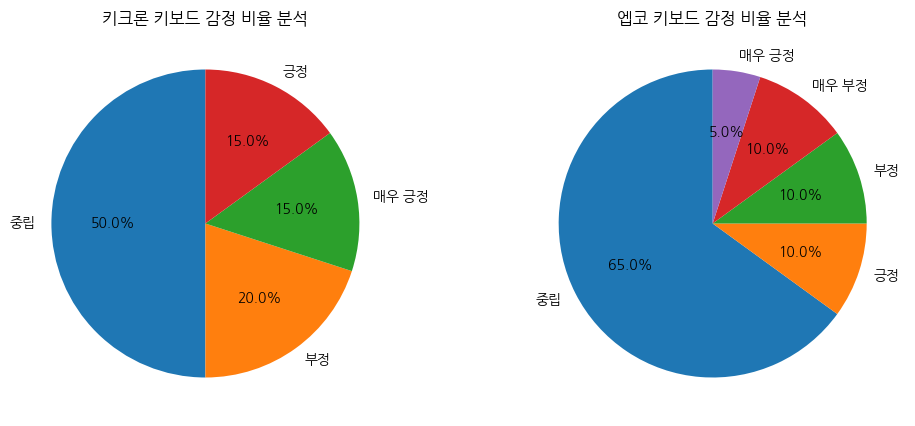

In [5]:
import matplotlib.pyplot as plt

# 파이 차트
emotion_kCounts = df["키크론_감정"].value_counts()
emotion_aCounts = df["엡코_감정"].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(emotion_kCounts, labels=emotion_kCounts.index, autopct="%1.1f%%", startangle=90)
plt.title("키크론 키보드 감정 비율 분석")

plt.subplot(1, 2, 2)
plt.pie(emotion_aCounts, labels=emotion_aCounts.index, autopct="%1.1f%%", startangle=90)
plt.title("엡코 키보드 감정 비율 분석")

plt.show()

In [32]:
print(emotion_kCounts)
print(emotion_aCounts)

키크론_감정
중립       10
부정        4
매우 긍정     3
긍정        3
Name: count, dtype: int64
엡코_감정
중립       13
긍정        2
부정        2
매우 부정     2
매우 긍정     1
Name: count, dtype: int64


In [33]:
emotion_kCounts["매우 부정"] = 0
print(emotion_kCounts)

키크론_감정
중립       10
부정        4
매우 긍정     3
긍정        3
매우 부정     0
Name: count, dtype: int64


###**감정 비교 분석**

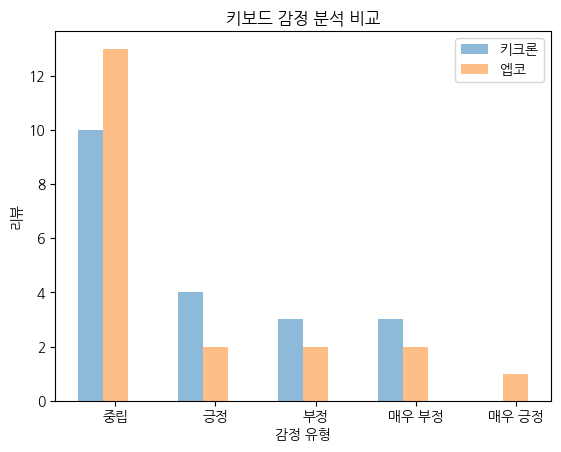

In [35]:
import numpy as np

index = np.arange(5)
bar_width = 0.25

plt.bar(index, emotion_kCounts.values, bar_width, alpha=0.5, label="키크론")
plt.bar(index+bar_width, emotion_aCounts.values, bar_width, alpha=0.5, label="엡코")
plt.xticks(np.arange(bar_width, 5+bar_width, 1), emotion_aCounts.index)
plt.title("키보드 감정 분석 비교")
plt.xlabel("감정 유형")
plt.ylabel("리뷰")
plt.legend()
plt.show()